##### THE SPARKS FOUNDATION May'21

### Task 4 -Exploratory Data Analysis - Terrorism

#### Author: Tushar Suresh Patil

#### Aim

● Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

● As a security/defense analyst, try to find out the hot zone of terrorism.

● What all security issues and insights we can derive by EDA?

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

#### Loading dataset

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.shape

(181691, 135)

In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

#### Rename columns

In [6]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

drop useless columns

In [7]:
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [8]:
df.shape

(181691, 18)

In [9]:
df.head(2).T

,0,1
Year,1970,1970
Month,7,0
Day,2,0
Country,Dominican Republic,Mexico
state,NaN,Federal
Region,Central America & Caribbean,North America
city,Santo Domingo,Mexico city
latitude,18.456792,19.371887
longitude,-69.951164,-99.086624
AttackType,Assassination,Hostage Taking (Kidnapping)


#### Any Missing Values??

In [10]:
df.isnull().sum()/len(df) *100

Year            0.000000
Month           0.000000
Day             0.000000
Country         0.000000
state           0.231712
Region          0.000000
city            0.238867
latitude        2.507554
longitude       2.508104
AttackType      0.000000
Killed          5.676120
Wounded         8.977330
Target          0.350045
Summary        36.396409
Group           0.000000
Target_type     0.000000
Weapon_type     0.000000
Motive         72.171984
dtype: float64

In [11]:
df=df.drop(['Motive','Summary'],axis =1)

In [12]:
df.shape

(181691, 16)

### Exploratory Data Analysis

#### 1.Country

#### Top Countries affected by Terror Attacks

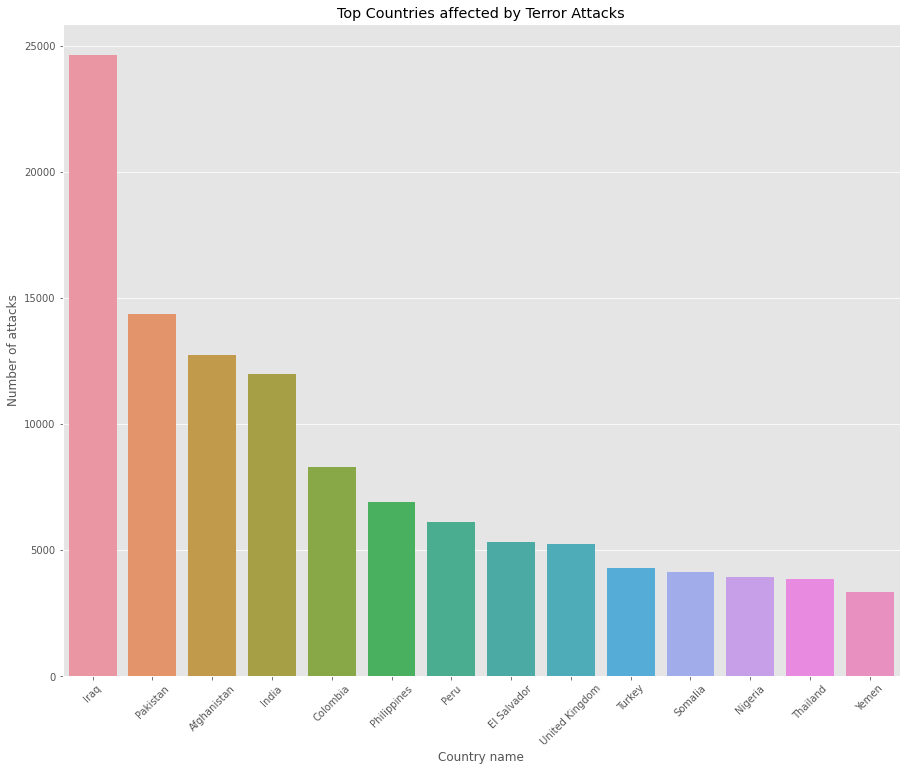

In [13]:
plt.figure(figsize=(15,12))
country = df['Country'].value_counts().reset_index()
sns.barplot(x='index', y='Country', data =country[:14])
plt.title('Top Countries affected by Terror Attacks')
plt.xlabel('Country name')
plt.ylabel('Number of attacks')
plt.xticks(rotation=45)
plt.show()

### 2.City

#### Top Cities affected by Terror Attacks

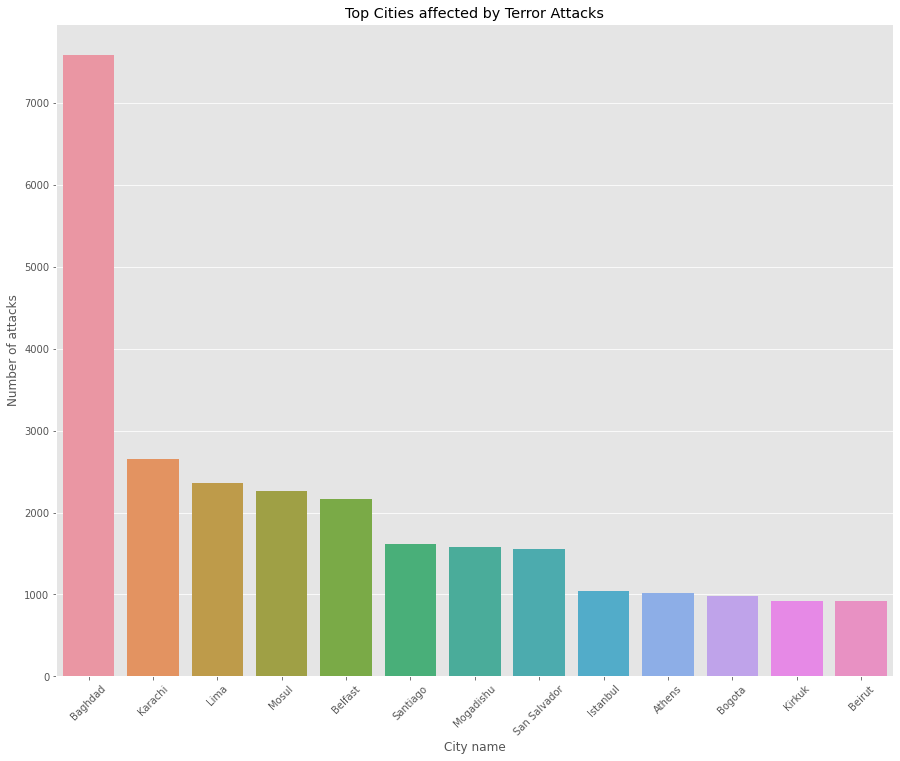

In [14]:
city = df['city'].value_counts().reset_index()
plt.figure(figsize=(15,12))

sns.barplot(x='index', y='city', data =city[1:14])
plt.title('Top Cities affected by Terror Attacks')
plt.xlabel('City name')
plt.ylabel('Number of attacks')
plt.xticks(rotation=45)
plt.show()

#### Percentage of occured attacks by Country

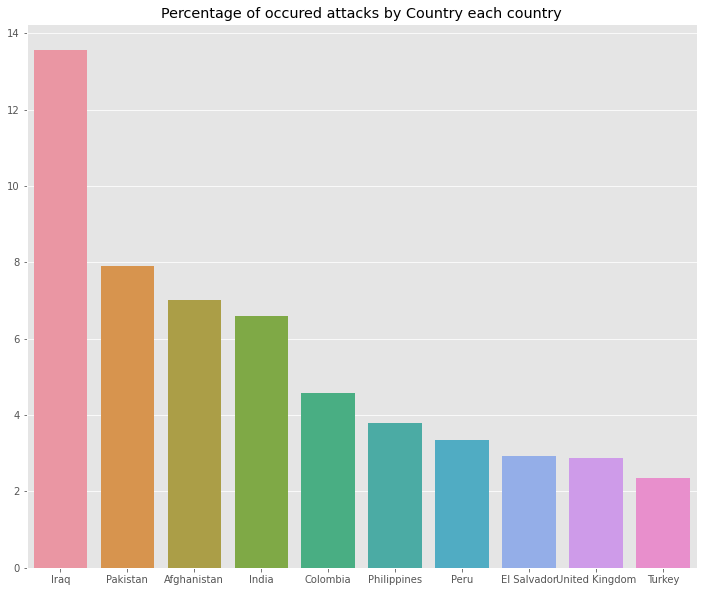

In [15]:
pers_attack = df['Country'].value_counts() /len(df['Country']) *100
plt.figure(figsize=(12,10))
sns.barplot(x = pers_attack[:10].index, y = pers_attack[:10].values)
# pers_attack[:10].plot(kind = 'bar')
plt.title('Percentage of occured attacks by Country each country')
plt.show()

### 3.Region

#### Terrorist Activities by Region

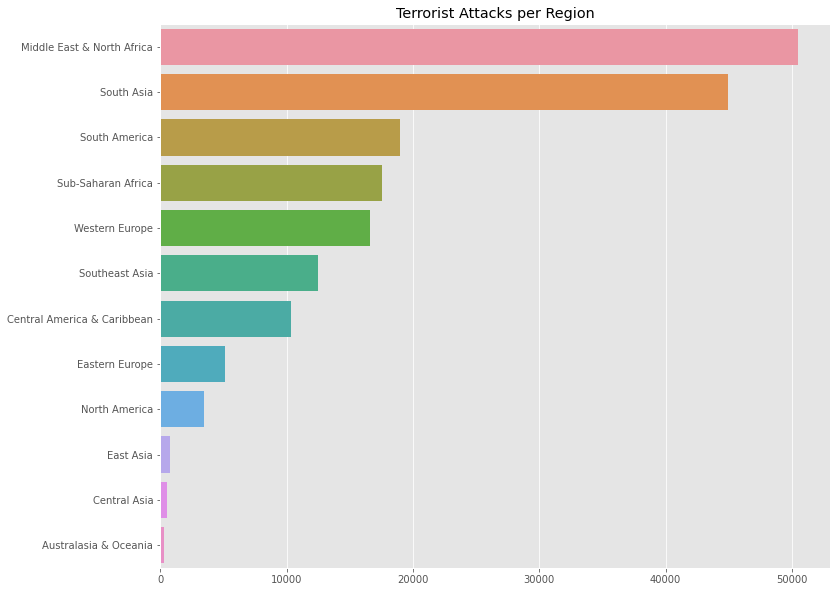

In [16]:
plt.figure(figsize = (12,10))
sns.barplot(x=df['Region'].value_counts().values, y=df['Region'].value_counts().index)
plt.title('Terrorist Attacks per Region')
plt.show()

#### Terrorist Activities by Region year wise

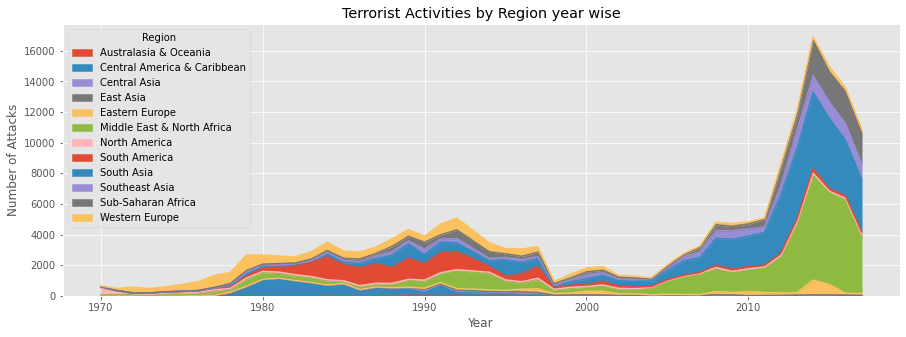

In [17]:
pd.crosstab(df.Year, df.Region).plot(kind='area',figsize=(15,5))
plt.title('Terrorist Activities by Region year wise')
plt.ylabel('Number of Attacks')
plt.show()

### 4. Year

#### Terrorist Attacks in each Year

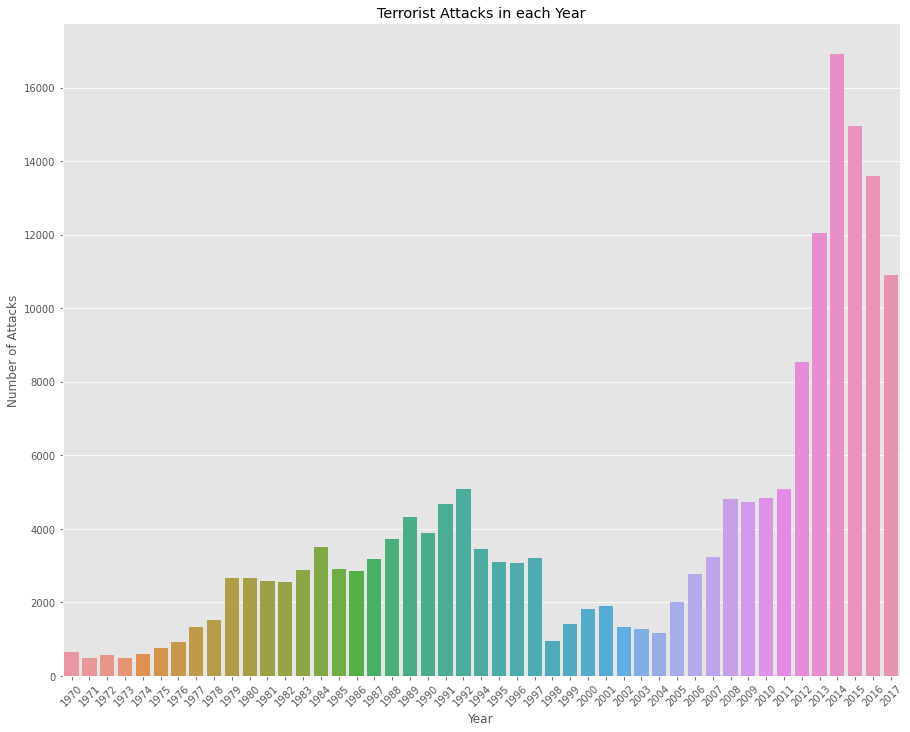

In [18]:
plt.figure(figsize=(15,12))
sns.countplot(df['Year'])
plt.xticks(rotation =45)
plt.title('Terrorist Attacks in each Year')
plt.ylabel('Number of Attacks')
# plt.grid()
plt.show()

### 5.People were killed in a Terrorist Attack 

#### Peoples were killed in a Terrorist Attack in each Year

In [19]:
killed=df.groupby('Year').sum()['Killed'].reset_index()
year=df.groupby('Year').size()
year=pd.DataFrame({'Attack': year}) 
year = year.reset_index()
killed= killed.drop(['Year'], axis=1)
new_year=pd.concat([year,killed],axis=1)

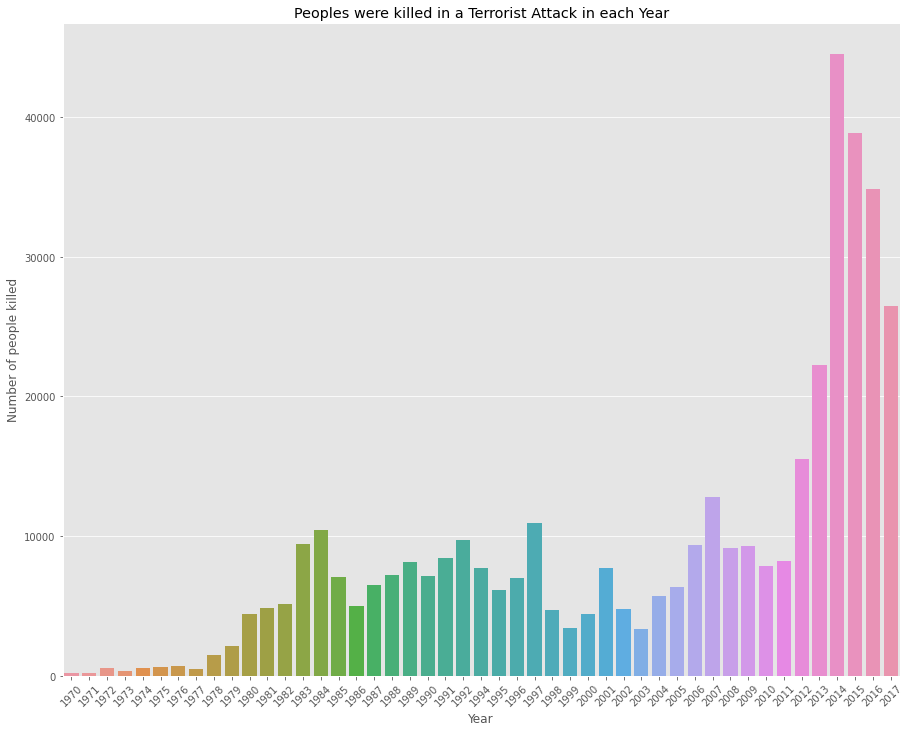

In [20]:
plt.figure(figsize=(15,12))
sns.barplot(data = new_year, x='Year', y='Killed')
plt.xticks(rotation =45)
plt.title('Peoples were killed in a Terrorist Attack in each Year')
plt.ylabel('Number of people killed')
plt.xlabel('Year')
plt.show()


#### Number of Attack and number of killed Persons in each year

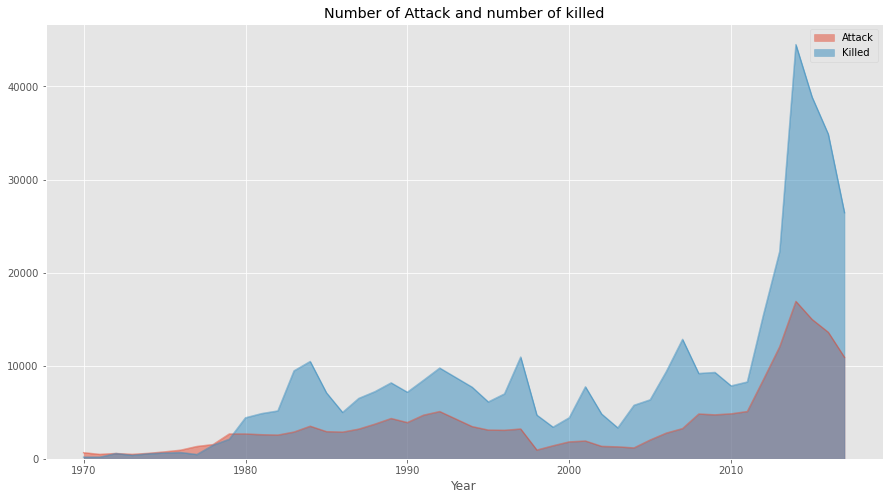

In [21]:
new_year.plot.area(stacked=False,x='Year',figsize=(15, 8));
plt.title('Number of Attack and number of killed')
# plt.grid()
plt.show()

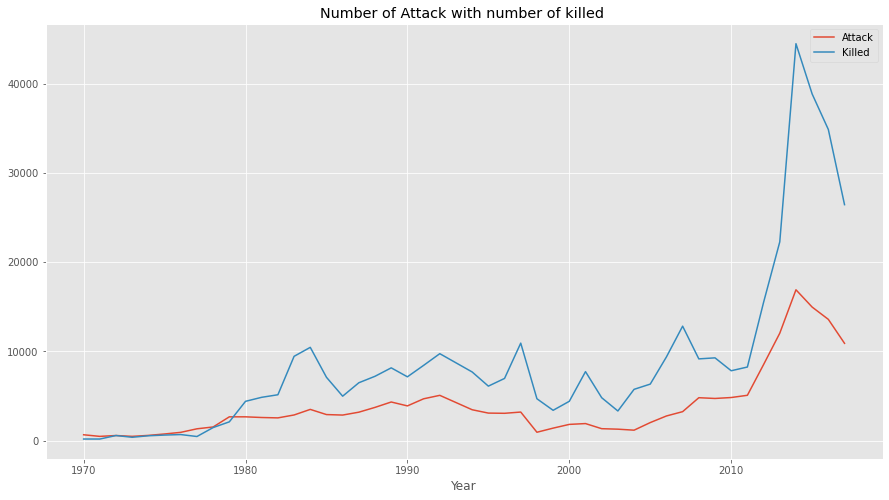

In [22]:
new_year.plot(x='Year',figsize=(15, 8))
plt.title('Number of Attack with number of killed ')
plt.show()

### 6. Different types of Attack_Type

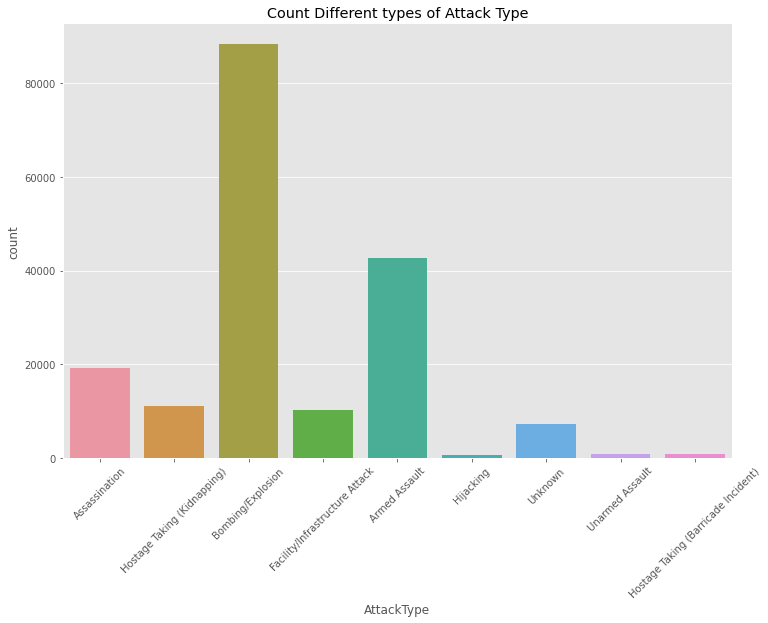

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(df['AttackType'])
plt.title('Count Different types of Attack Type')
plt.xticks(rotation =45)
plt.show()

#### Different types of Attack in each Year

In [24]:
attack_type=df['AttackType'].value_counts().reset_index()
attack_type =  attack_type.rename(columns = {'index': 'Attack Type','AttackType':'Attack'})

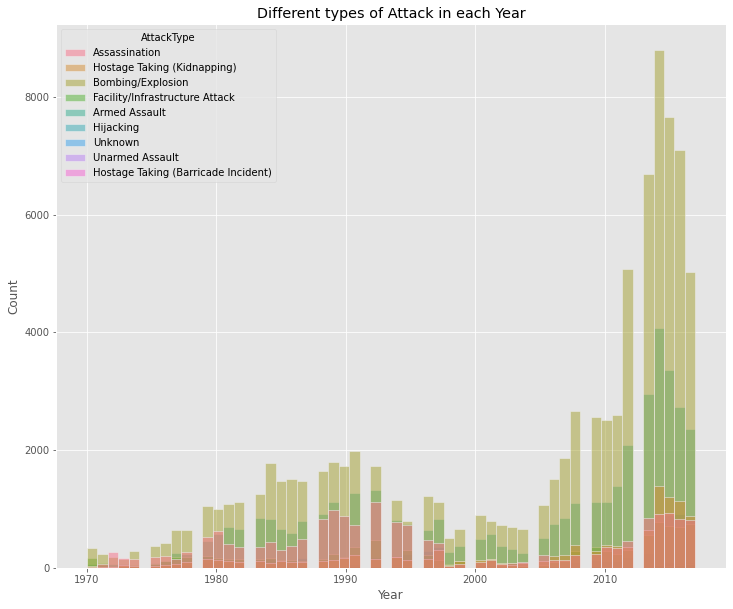

In [25]:
plt.figure(figsize=(12,10))
sns.histplot(x = 'Year' , data =df,hue = 'AttackType')
plt.title('Different types of Attack in each Year')
plt.show()

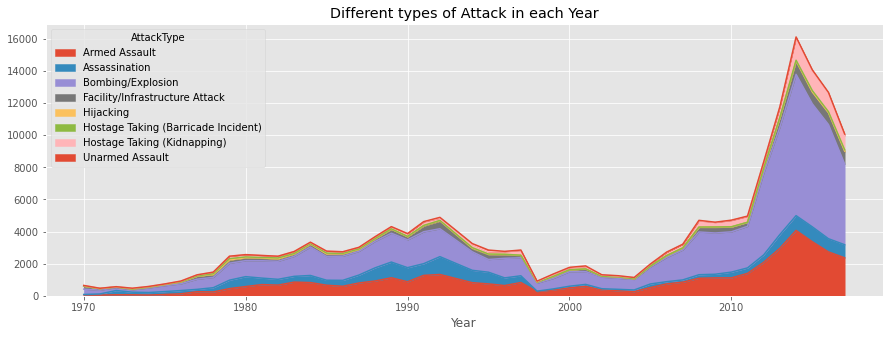

In [26]:
attack_df=df[df['AttackType']!='Unknown']
pd.crosstab(attack_df.Year, attack_df.AttackType).plot(kind='area',figsize=(15,5))
plt.title('Different types of Attack in each Year')
plt.show()

### 7.Different Types of Target 

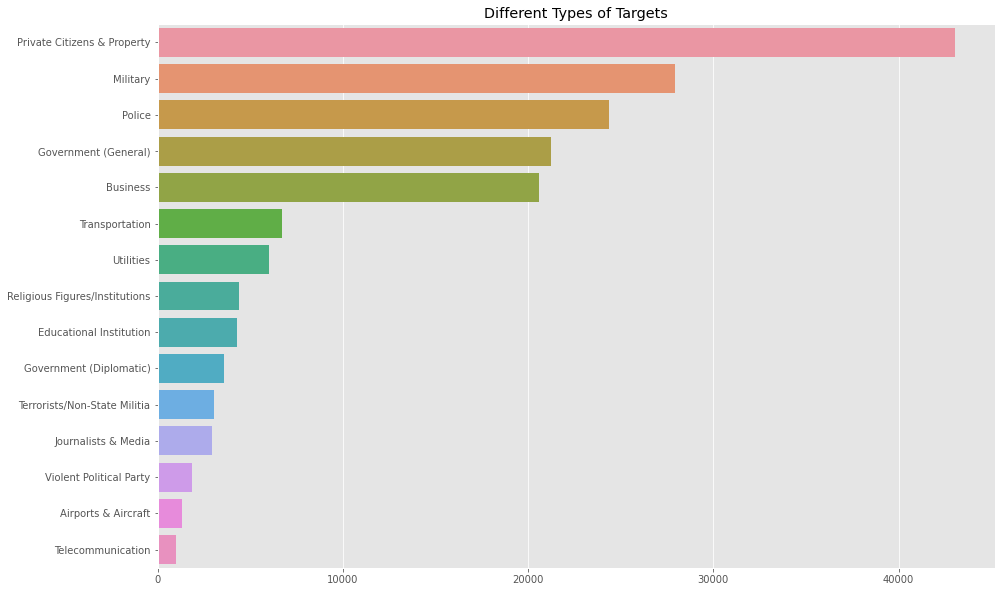

In [27]:
plt.figure(figsize=(15,10))
new_df = df[df['Target']!='Unknown']
sns.barplot(y=new_df['Target_type'].value_counts()[:15].index,x=new_df['Target_type'].value_counts()[:15].values)
plt.title('Different Types of Targets')
plt.show()

### 8. Terrorist Organizations

#### 15 Most Active Terrorist Organizations

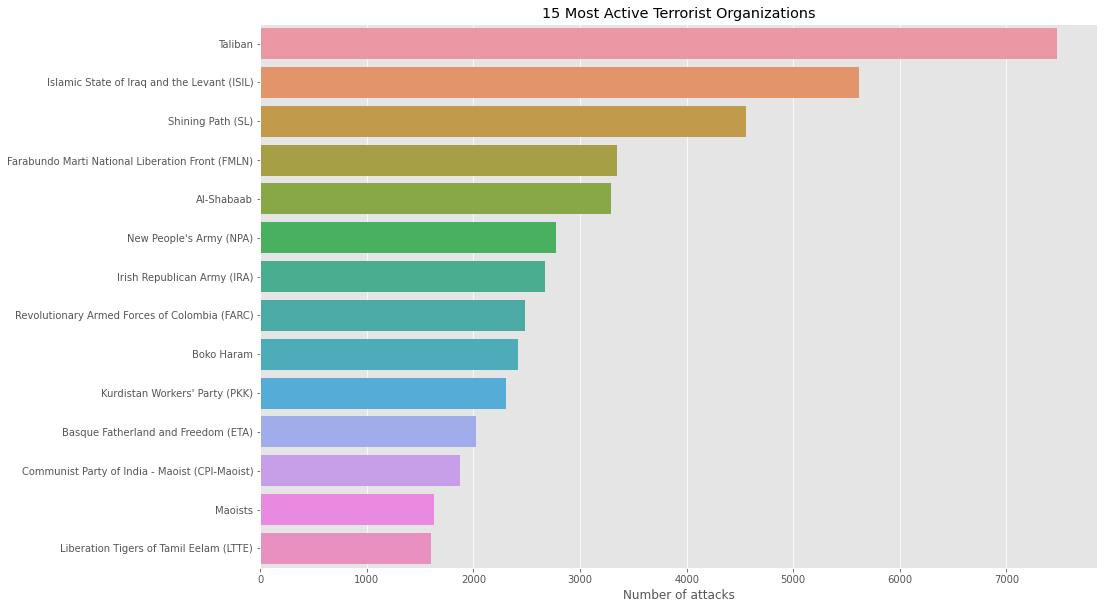

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(y=df['Group'].value_counts()[1:15].index,x=df['Group'].value_counts()[1:15].values)
plt.title('15 Most Active Terrorist Organizations')
plt.xlabel('Number of attacks')
plt.show()


### Conclusion 

#### 1. Top 3 Countries affected by Terror Attacks:
       1)Iraq           
       2)Pakistan       
       3)Afghanistan    
      
#### 2. Top 3 Cities affected by Terror Attacks:
       1)Baghdad               
       2)Karachi           
       3)Lima  
       
#### 3. Top 3 Regions affected by Terror Attacks:
       1)Middle East & North Africa               
       2)South Asia           
       3)South America 
  
#### 4. Most number of terror attack : Year 2014
#### 5.  Andorra Country has suffered the minimum number of terror attacks

#### 6. Major Target Type
       1)Private Citizens & Property
       2)Military                       
       3)Police
       
#### 7. Most Active Terrorist Organizations
       1)Taliban
       2)Islamic State of Iraq and the Levant (ISIL)
       3)Shining Path (SL) 